

# <font color='blue'> Gradient Boosting</font>

## Building a Gradient Boosting Classifier in Python

In [23]:
# Imports
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
# Generating the dataset
X, y = make_hastie_10_2(n_samples = 5000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
X_train

array([[ 0.62596881,  0.34505545,  0.07621999, ...,  1.10718146,
         0.93526857,  0.84465689],
       [ 1.12530314,  0.81271999, -0.54746456, ...,  1.88129123,
         0.3529644 , -0.9961376 ],
       [-0.04402813, -0.98619774,  1.41195609, ...,  0.26923568,
        -0.38679011,  1.06505591],
       ...,
       [-0.9985621 , -1.46030099, -0.19547347, ...,  0.16181072,
        -1.46249496, -1.04631555],
       [-0.60432042, -0.79050217,  1.2333007 , ..., -0.64964674,
        -1.55835983, -0.64502358],
       [-0.72003523,  1.58436173,  1.88134609, ...,  0.68867675,
         0.3663614 ,  0.88140427]])

In [26]:
y_train

array([ 1.,  1., -1., ..., -1., -1., -1.])

In [27]:
# Creatingthe classifier
est = GradientBoostingClassifier(n_estimators = 200, max_depth = 3)

In [28]:
# Creating the model
est.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [29]:
# Class (label) predictions
pred = est.predict(X_test)

In [30]:
# Score on test data (Accuracy)
acc = est.score(X_test, y_test)
print('Accuracy: %.4f' % acc)

Accuracy: 0.9264


In [31]:
# Prediction of class probabilities
est.predict_proba(X_test)[0]

array([0.82638636, 0.17361364])

In [10]:
# Classifier - Ensemble Method (Gradient Boosting Classifier)
est

GradientBoostingClassifier(n_estimators=200)

In [11]:
# Base estimator
est.estimators_[0, 0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x2B8F8AB6B40)

### Most important parameters:

- Number of regression trees (n_estimators)

- Depth of face tree (max_depth)

- Loss function


## Building A Gradient Boosting Regressor in Python

### Viewing the Data and the Proposed Regression Line

Populating the interactive namespace from numpy and matplotlib


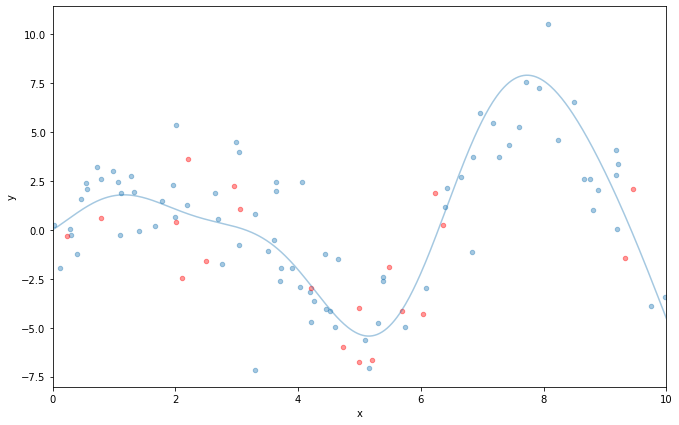

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
%pylab inline

FIGSIZE = (11, 7)

# Function approximation (optimal regression line)
def reg_line(x):
    return x * np.sin(x) + np.sin(2 * x)

# Generating training and test data
def gen_data(n_samples = 200):
    
    # Generating random data mass
    np.random.seed(15)
    X = np.random.uniform(0, 10, size = n_samples)[:, np.newaxis]
    y = reg_line(X.ravel()) + np.random.normal(scale = 2, size = n_samples)
    
    # Dividing into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
    
    return X_train, X_test, y_train, y_test

# Construction of datasets
X_train, X_test, y_train, y_test = gen_data(100)

# Data for the regression line
x_plot = np.linspace(0, 10, 500)

# Plotting data
def plot_data(alpha = 0.4, s = 20):
    
    # Creating figure
    fig = plt.figure(figsize = FIGSIZE)
    
    # Generating plot
    gt = plt.plot(x_plot, reg_line(x_plot), alpha = alpha)

    # Plotting training and test data
    plt.scatter(X_train, y_train, s = s, alpha = alpha)
    plt.scatter(X_test, y_test, s = s, alpha = alpha, color = 'red')
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('x')

# Formatting
annotation_kw = {'xycoords': 'data', 'textcoords': 'data', 'arrowprops': {'arrowstyle': '->', 'connectionstyle': 'arc'}}

# Plot
plot_data()
# Blue - Training
# red - Test

### Plot of 2 Trees with Different Depths

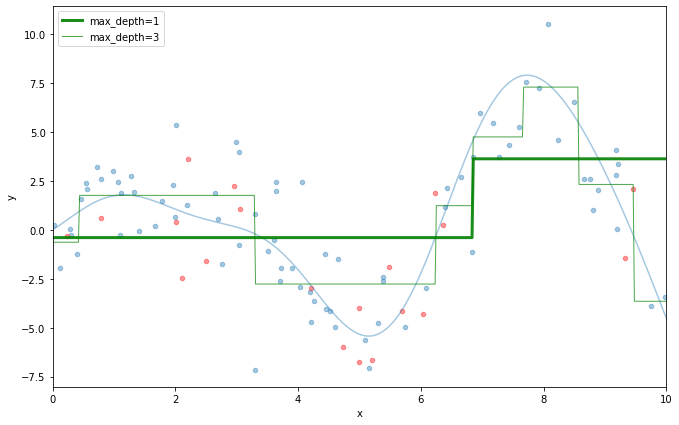

In [14]:
from sklearn.tree import DecisionTreeRegressor

plot_data()

# Decision trees with max-depth = 1
est = DecisionTreeRegressor(max_depth = 1).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label = 'max_depth=1', color = 'g', alpha = 0.9, linewidth = 3)

# Decision trees with max-depth = 3
est = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label = 'max_depth=3', color = 'g', alpha = 0.7, linewidth = 1)

# Legend position
plt.legend(loc = 'upper left')

### Applying Gradient Boosting Regressor

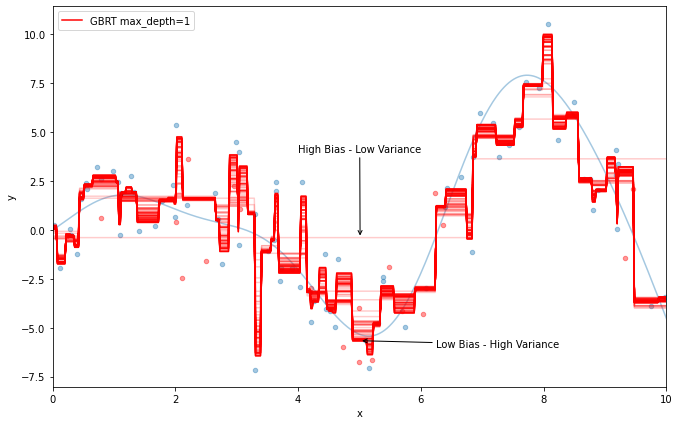

In [15]:
from itertools import islice
from sklearn.ensemble import GradientBoostingRegressor

plot_data()

# REGRESSOR GBRT
est = GradientBoostingRegressor(n_estimators = 1000, max_depth = 1, learning_rate = 1.0)

# Training Model
est.fit(X_train, y_train)
ax = plt.gca()
first = True

# Steps through forecasts as we add more trees
for pred in islice(est.staged_predict(x_plot[:, np.newaxis]), 0, est.n_estimators, 10):
    plt.plot(x_plot, pred, color = 'r', alpha = 0.2)
    if first:
        ax.annotate('High Bias - Low Variance', 
                    xy = (x_plot[x_plot.shape[0] // 2], pred[x_plot.shape[0] // 2]), 
                    xytext = (4, 4), 
                    **annotation_kw)
        first = False

# Predictions
pred = est.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, pred, color = 'r', label = 'GBRT max_depth=1')
ax.annotate('Low Bias - High Variance', 
            xy = (x_plot[x_plot.shape[0] // 2], pred[x_plot.shape[0] // 2]), 
            xytext = (6.25, -6), 
            **annotation_kw)

# Legend position
plt.legend(loc = 'upper left')

### Diagnosing If the Model Suffers from Overfitting

Text(810, 3.5, 'Gap Training-Test')

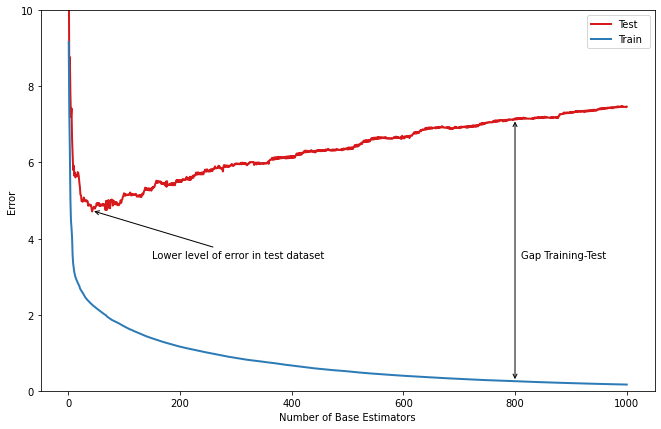

In [16]:
def deviance_plot(est, X_test, y_test, ax=None, label='', train_color='#2c7bb6', test_color='#d7191c', alpha=1.0, ylim = (0, 10)):
    n_estimators = len(est.estimators_)
    test_dev = np.empty(n_estimators)

    for i, pred in enumerate(est.staged_predict(X_test)):
       test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig = plt.figure(figsize = FIGSIZE)
        ax = plt.gca()
        
    ax.plot(np.arange(n_estimators) + 1, test_dev, color = test_color, label = 'Test %s' % label, linewidth = 2, alpha = alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color = train_color, label = 'Train %s' % label, linewidth = 2, alpha = alpha)
    ax.set_ylabel('Error')
    ax.set_xlabel('Number of Base Estimators')
    ax.set_ylim(ylim)
    return test_dev, ax

# Applies the function to the test data to measure the overfitting of our model (est)
test_dev, ax = deviance_plot(est, X_test, y_test)
ax.legend(loc = 'upper right')

# Legend
ax.annotate('Lower level of error in test dataset', 
            xy = (test_dev.argmin() + 1, test_dev.min() + 0.02), 
            xytext = (150, 3.5), 
            **annotation_kw)

ann = ax.annotate('', xy = (800, test_dev[799]),  xycoords = 'data',
                  xytext = (800, est.train_score_[799]), textcoords = 'data',
                  arrowprops = {'arrowstyle': '<->'})
ax.text(810, 3.5, 'Gap Training-Test')

## Regularization (Avoid Overfitting)

1. Change the structure of the tree
2. Shrinkage
3. Stochastic Gradient Boosting

### Changing the Tree Structure

By changing the min_samples_leaf we guarantee a larger number of samples per sheet.

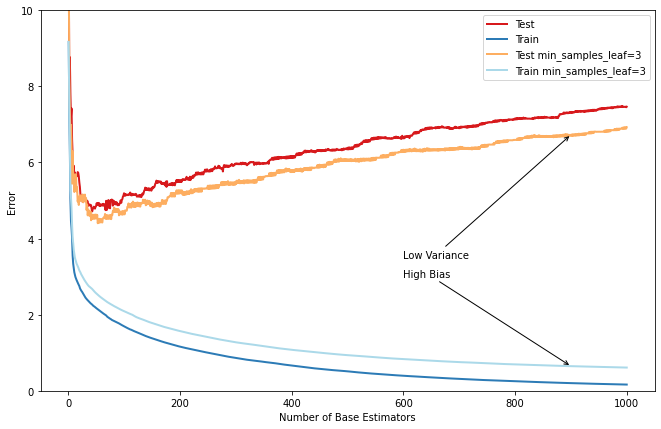

In [17]:
def fmt_params(params):
    return ", ".join("{0}={1}".format(key, val) for key, val in params.items())

fig = plt.figure(figsize = FIGSIZE)
ax = plt.gca()

for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')), ({'min_samples_leaf': 3}, ('#fdae61', '#abd9e9'))]:
    est = GradientBoostingRegressor(n_estimators = 1000, max_depth = 1, learning_rate = 1.0)
    est.set_params(**params)
    est.fit(X_train, y_train)
    test_dev, ax = deviance_plot(est, 
                                 X_test, 
                                 y_test, 
                                 ax = ax, 
                                 label = fmt_params(params),
                                 train_color = train_color, 
                                 test_color = test_color)
    
ax.annotate('High Bias', xy = (900, est.train_score_[899]), xytext= ( 600, 3), **annotation_kw)
ax.annotate('Low Variance', xy = (900, test_dev[899]), xytext = (600, 3.5), **annotation_kw)
plt.legend(loc = 'upper right')

### Shrinkage

Reduces the learning of each tree by reducing learning_rate.

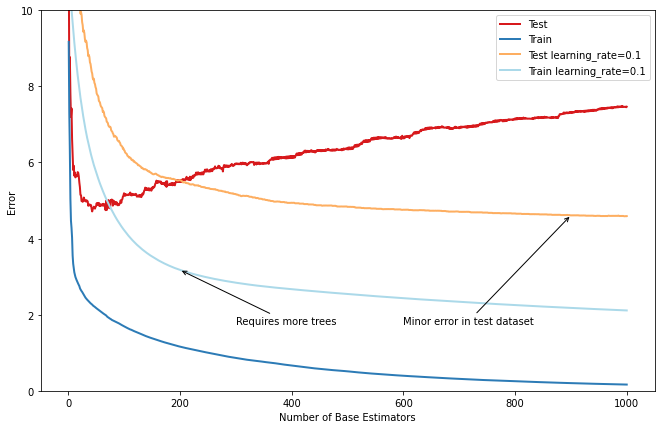

In [18]:
fig = plt.figure(figsize = FIGSIZE)
ax = plt.gca()

for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')), ({'learning_rate': 0.1}, ('#fdae61', '#abd9e9'))]:
    est = GradientBoostingRegressor(n_estimators = 1000, max_depth = 1, learning_rate = 1.0)
    est.set_params(**params)
    est.fit(X_train, y_train)
    
    test_dev, ax = deviance_plot(est, 
                                 X_test, 
                                 y_test, 
                                 ax = ax, 
                                 label = fmt_params(params),
                                 train_color = train_color, 
                                 test_color = test_color)
    
ax.annotate('Requires more trees', xy = (200, est.train_score_[199]), xytext=(300, 1.75), **annotation_kw)
ax.annotate('Minor error in test dataset', xy = (900, test_dev[899]), xytext=(600, 1.75), **annotation_kw)

plt.legend(loc = 'upper right')

### Stochastic Gradient Boosting

Create strain dataset subsamples before growing each tree. 

Creates subsamples of attributes before finding the best split node (max_features). Works best if there is large volume of data.

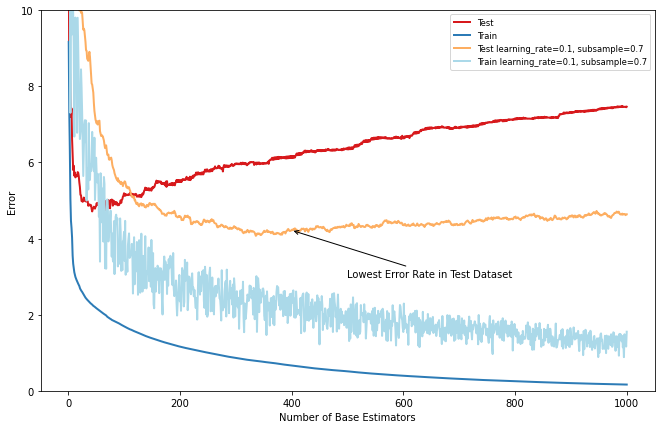

In [19]:
fig = plt.figure(figsize=FIGSIZE)
ax = plt.gca()
for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')), ({'learning_rate': 0.1, 'subsample': 0.7}, ('#fdae61', '#abd9e9'))]:
    est = GradientBoostingRegressor(n_estimators = 1000, max_depth = 1, learning_rate = 1.0, random_state = 1)
    est.set_params(**params)
    est.fit(X_train, y_train)
    test_dev, ax = deviance_plot(est, 
                                 X_test, 
                                 y_test, 
                                 ax = ax, 
                                 label = fmt_params(params), 
                                 train_color=train_color, 
                                 test_color=test_color)
    
ax.annotate('Lowest Error Rate in Test Dataset', xy = (400, test_dev[399]), xytext = (500, 3.0), **annotation_kw)

plt.legend(loc = 'upper right', fontsize='small')

### Hyperparameter Tunning with Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Parameters Grid
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [4, 5, 6],
              'min_samples_leaf': [3, 4, 5],
              'subsample': [0.3, 0.5, 0.7],
              'n_estimators': [400, 700, 1000, 2000, 3000]
              }

# Regressor
est = GradientBoostingRegressor()

# Template created with GridSearchCV
gs_cv = GridSearchCV(est, param_grid, scoring = 'neg_mean_squared_error', n_jobs = 4).fit(X_train, y_train)

# Prints the best parameters
print('Best Hyperparameters %r' % gs_cv.best_params_)

Best Hyperparameters {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 3000, 'subsample': 0.5}


### Recreates the Model with the Best Parameters

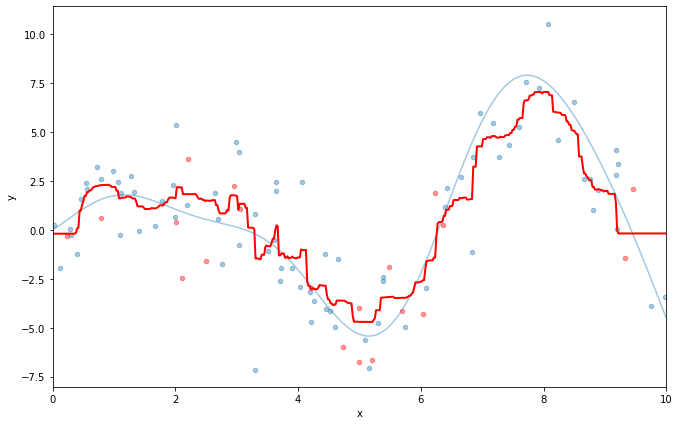

In [21]:
est.set_params(**gs_cv.best_params_)
est.fit(X_train, y_train)

# Plot
plot_data()
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color = 'r', linewidth = 2)